# Game Playing Systems

Most of the code is included ad sepparate python files. The notebook is only used for comparing and evaluating the models

In [ ]:
# Import game functions and classes 
from Game import Game, AiPlayer, NormalPlayer, comparePlayers

# Import Models from python files
from ExhaustiveTreeSearch import ExhaustiveTreeSearch
from RandomSearch import RandomSearch
from RuleBased import RuleBased
from MonteCarloTreeSearch import MonteCarloTreeSearch

In [ ]:
# Test play between two human players
player1 = NormalPlayer('Viktor')
player2 = NormalPlayer('Emilie')
tictac = Game(player1, player2)
# tictac.start()

In [ ]:
# Player vs Exhaustive tree
ex_tree = ExhaustiveTreeSearch()
ex_player = AiPlayer(ex_tree)

random_search = RandomSearch()
random_player = AiPlayer(random_search)

clf = MonteCarloTreeSearch()
monte_player = AiPlayer(clf)

ruleCarlo = MonteCarloTreeSearch(rollout = 'rules')
rule_carlo_player = AiPlayer(ruleCarlo)

ruleCarlo_1000 = MonteCarloTreeSearch(iterations = 1000, rollout = 'rules')
rule_carlo_1000_player = AiPlayer(ruleCarlo_1000)

rules = RuleBased()
rule_player = AiPlayer(rules)

players = [ex_player, monte_player, rule_carlo_player,rule_carlo_1000_player, rule_player]


Using rollout_rules
Using rollout_rules


In [ ]:
from itertools import permutations
idx_list = range(len(players))

perm = permutations(idx_list, 2)
iterations = 25

wins = [0 for _ in players]
draws = [0 for _ in players]

for pair in perm:
    # res =  [wins player 1, wins player 2, draws]
    print(pair)
    res = comparePlayers(players[pair[0]], players[pair[1]], iterations=iterations, ifprint = True)
    wins[pair[0]] += res[0]
    wins[pair[1]] += res[1]
    draws[pair[0]] += res[2]
    draws[pair[1]] += res[2]

print(wins)
print(draws)

 ['X' 'O' 'O']]
Starting game 11/25:
Starting player is O
Winner is O
[['O' 'X' 'O']
 ['X' 'O' '']
 ['O' '' 'X']]
Starting game 12/25:
Starting player is X
Game is a tie
[['O' 'X' 'O']
 ['X' 'X' 'O']
 ['X' 'O' 'X']]
Starting game 13/25:
Starting player is O
Game is a tie
[['X' 'O' 'X']
 ['O' 'X' 'O']
 ['O' 'X' 'O']]
Starting game 14/25:
Starting player is O
Game is a tie
[['X' 'O' 'X']
 ['X' 'O' 'O']
 ['O' 'X' 'O']]
Starting game 15/25:
Starting player is O
Game is a tie
[['X' 'X' 'O']
 ['O' 'O' 'X']
 ['X' 'O' 'O']]
Starting game 16/25:
Starting player is X
Game is a tie
[['X' 'O' 'X']
 ['O' 'X' 'X']
 ['O' 'X' 'O']]
Starting game 17/25:
Starting player is X
Game is a tie
[['O' 'X' 'O']
 ['O' 'X' 'X']
 ['X' 'O' 'X']]
Starting game 18/25:
Starting player is O
Game is a tie
[['X' 'O' 'O']
 ['O' 'X' 'X']
 ['X' 'O' 'O']]
Starting game 19/25:
Starting player is O
Game is a tie
[['O' 'X' 'O']
 ['O' 'X' 'O']
 ['X' 'O' 'X']]
Starting game 20/25:
Starting player is X
Winner is X
[['X' 'O' 'X']
 

In [ ]:
number_of_matches = iterations * 2 * (len(players) - 1)

wins = [count/number_of_matches for count in wins]
draws = [count/number_of_matches for count in draws]
losses = [0 for _ in players]
for i in range(len(wins)):
    losses[i] = 1-wins[i]-draws[i]

                  players  losses   wins  draws
0               ex_player   0.195  0.075  0.730
1            monte_player   0.100  0.085  0.815
2       rule_carlo_player   0.095  0.015  0.890
3  rule_carlo_1000_player   0.015  0.105  0.880
4             rule_player   0.005  0.130  0.865


<AxesSubplot:xlabel='players'>

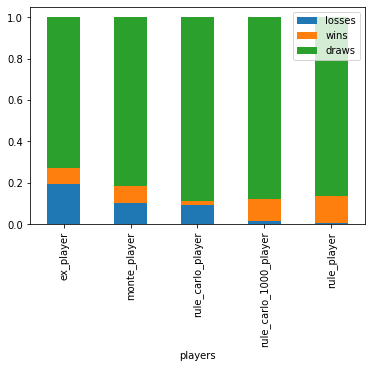

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    'players': ['ex_player', 'monte_player', 'rule_carlo_player','rule_carlo_1000_player', 'rule_player'], 
    'losses':losses,
    'wins': wins, 
    'draws': draws,
})
print(df)
#plt = sns.barplot(x = , y=wins)
#plt.set_ylabel("number of wins")


df.set_index('players').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='players'>

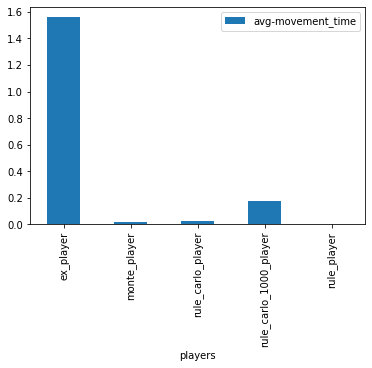

In [ ]:
avg_times = [player.avg_time() for player in players]
df_times = pd.DataFrame({
    'players': ['ex_player', 'monte_player', 'rule_carlo_player','rule_carlo_1000_player', 'rule_player'],
    'avg-movement_time':avg_times
})
df_times.set_index('players').plot(kind='bar')

<AxesSubplot:xlabel='players'>

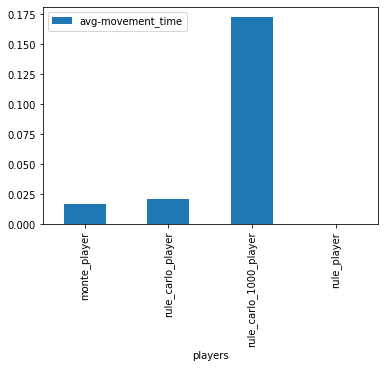

In [ ]:
idx = df[ df['players'] == 'ex_player' ].index
df_times.drop(idx, inplace = True)
df_times.set_index('players').plot(kind='bar')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b0e3b10c-dd17-44bc-b926-c293f040c57b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>